<a href="https://colab.research.google.com/github/cm609/Logica_fuzzy_cafeteria/blob/main/cafeteria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=0eab6f8ddb621cac42731622337f72300c0f92fc3509f581b451a910b0ec33d3
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
#variaveis que serão inseridas os valores
#avaliar em temperatura, quantidade de açucar e acrescimo da variavel aroma
temperatura = ctrl.Antecedent(np.arange(0, 101, 1), 'temperatura')
acucar = ctrl.Antecedent(np.arange(0, 11, 1), 'acucar')
aroma = ctrl.Antecedent(np.arange(0, 11, 1), 'aroma')

# Variável de saída
qualidade = ctrl.Consequent(np.arange(0, 11, 1), 'qualidade')

#funções de pertinecia para cada variavel de entrada e saida:
# Funções de pertinência para temperatura
temperatura['baixa'] = fuzz.trapmf(temperatura.universe, [0, 0, 20, 40])
temperatura['media'] = fuzz.trimf(temperatura.universe, [20, 40, 60])
temperatura['alta'] = fuzz.trimf(temperatura.universe, [40, 60, 80])
temperatura['muito_alta'] = fuzz.trapmf(temperatura.universe, [60, 80, 100, 100])

# Funções de pertinência para açúcar
acucar['nenhum'] = fuzz.trimf(acucar.universe, [0, 0, 2])
acucar['pouco'] = fuzz.trimf(acucar.universe, [0, 2, 6])
acucar['medio'] = fuzz.trimf(acucar.universe, [2, 6, 8])
acucar['muito'] = fuzz.trimf(acucar.universe, [6, 10, 10])

# Funções de pertinência para aroma
aroma['ruim'] = fuzz.trimf(aroma.universe, [0, 0, 2])
aroma['bom'] = fuzz.trimf(aroma.universe, [0, 2, 6])
aroma['satisfatorio'] = fuzz.trimf(aroma.universe, [2, 6, 8])
aroma['sublime'] = fuzz.trimf(aroma.universe, [6, 10, 10])

# Funções de pertinência para qualidade
qualidade['ruim'] = fuzz.trapmf(qualidade.universe, [0, 0, 2, 4])
qualidade['regular'] = fuzz.trimf(qualidade.universe, [2, 4, 6])
qualidade['bom'] = fuzz.trimf(qualidade.universe, [4, 6, 8])
qualidade['excelente'] = fuzz.trapmf(qualidade.universe, [6, 8, 10, 10])


In [32]:
#regras estabelecidas pela cafeteria com todas as combinação testadas e acrescimos de regras

regra1 = ctrl.Rule(temperatura['baixa'] & acucar['nenhum'] & aroma ['ruim'], qualidade['ruim'])
regra2 = ctrl.Rule(temperatura['baixa'] | acucar['nenhum'] & aroma['bom'], qualidade['ruim'])
regra3 = ctrl.Rule(temperatura['baixa'] & acucar['pouco'] | aroma['bom'], qualidade['ruim'])
regra4 = ctrl.Rule(temperatura['media'] & acucar['nenhum'] | aroma['ruim'], qualidade['ruim'])
regra5 = ctrl.Rule(temperatura['alta'] & acucar['nenhum'] & aroma['ruim'], qualidade['ruim'])

regra6 = ctrl.Rule(temperatura['alta'] & acucar['pouco'] & aroma['ruim'], qualidade['regular'])
regra7 = ctrl.Rule(temperatura['media'] & acucar['medio'] & aroma['bom'], qualidade['regular'])
regra8 = ctrl.Rule(temperatura['alta'] & acucar['nenhum'] & aroma['ruim'], qualidade['regular'])
regra9 = ctrl.Rule(temperatura['alta'] & acucar['nenhum'] & aroma['bom'], qualidade['regular'])
regra10 = ctrl.Rule(temperatura['media'] & acucar['nenhum'] & aroma['satisfatorio'], qualidade['regular'])
regra11 = ctrl.Rule(temperatura['muito_alta'] & acucar['nenhum'] & aroma['bom'], qualidade['regular'])

regra13 = ctrl.Rule(temperatura['media'] & acucar['muito'] & aroma['bom'], qualidade['bom'])
regra14 = ctrl.Rule(temperatura['baixa'] & acucar['muito'] & aroma['sublime'], qualidade['bom'])
regra15 = ctrl.Rule(temperatura['alta'] & acucar['medio'] & aroma['satisfatorio'], qualidade['bom'])
regra16 = ctrl.Rule(temperatura['media'] & acucar['muito'] & aroma['satisfatorio'], qualidade['bom'])
regra17 = ctrl.Rule(temperatura['media'] & acucar['muito'] & aroma['sublime'], qualidade['bom'])
regra18 = ctrl.Rule(temperatura['alta'] & acucar['medio'] & aroma['sublime'], qualidade['bom'])

regra19 = ctrl.Rule(temperatura['muito_alta'] & acucar['muito'] & aroma['satisfatorio'], qualidade['excelente'])
regra20 = ctrl.Rule(temperatura['muito_alta'] & acucar['muito'] & aroma['sublime'], qualidade['excelente'])


In [33]:
#inserindo as regras para o controle de sistema
qualidade_ctrl = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9, regra10, regra11, regra13, regra14, regra15, regra16, regra17, regra18, regra19, regra20,])

Café está com nota  =  8.444444444444445 



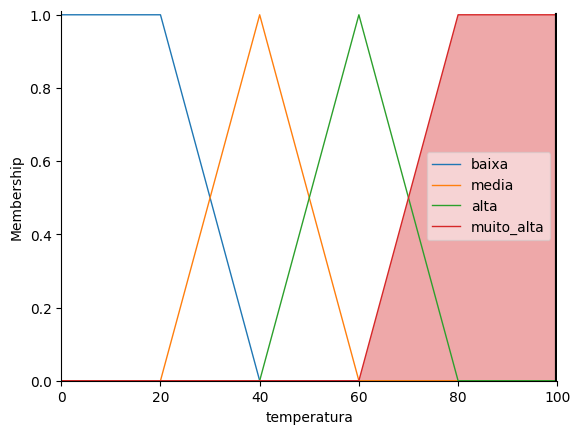

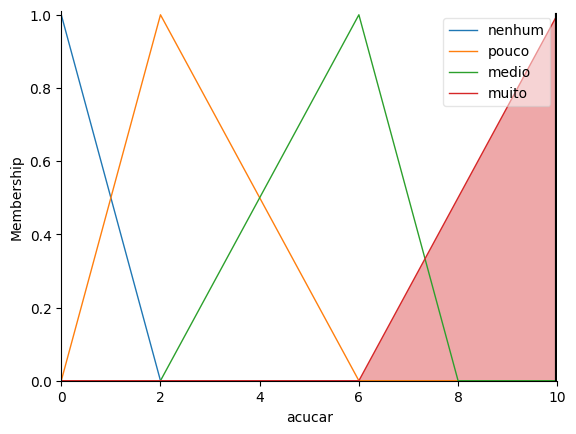

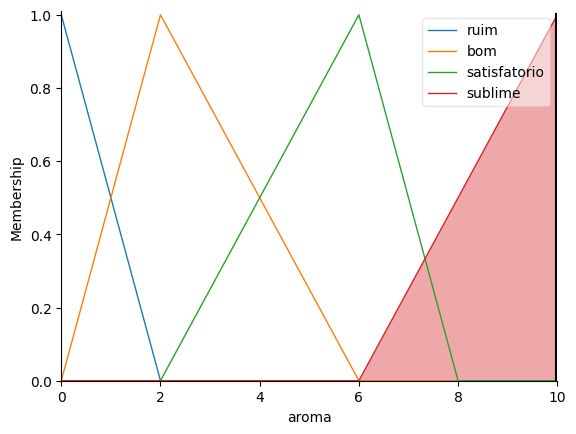

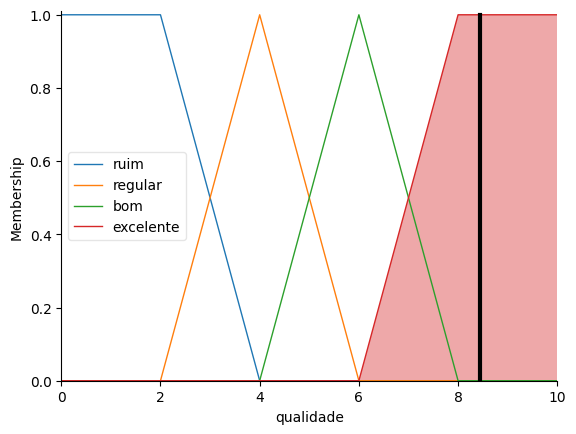

In [35]:
#criando a variavel do simulador para acessar o controle de regras
qualidade_simulador = ctrl.ControlSystemSimulation(qualidade_ctrl)
#fazendo a inserção dos valores
qualidade_simulador.input['temperatura'] = 100
qualidade_simulador.input['acucar'] = 10
qualidade_simulador.input['aroma'] = 10
#=========================================
# Computando o resultado que irá devolver
qualidade_simulador.compute()
#=========================================

#realizando a saida da velocidade do ventilador
print("Café está com nota  = ",qualidade_simulador.output['qualidade'],"\n")
#visualizar a função gorjeta simulator
temperatura.view(sim=qualidade_simulador)
acucar.view(sim=qualidade_simulador)
aroma.view(sim=qualidade_simulador)
qualidade.view(sim=qualidade_simulador)